In [4]:
import numpy as np
import fidimag
from fidimag.common import CuboidMesh
from fidimag.micro import UniaxialAnisotropy, Demag, UniformExchange, Sim, Zeeman, Demag
import matplotlib.pyplot as plt

In [9]:
!rm -rf unnamed_vtks/*.vtk
!rm -rf unnamed_npys/*.npy


n = 3
mesh = CuboidMesh(nx=(2*n-1), ny=(2*n - 1), nz=1, dx=1, dy=1, dz=1, unit_length=1e-9)
A = 1e-11
Ms = 8e5
np.random.seed(0)
def Ms_func(pos):
    x, y, z = pos
    if ((x - 0.5) % 2) == 0 and ((y - 0.5) % 2) == 0:
        return Ms

    else:
        return 0
    
    
def Ku_axis(pos):
    axis = np.random.uniform(-1, 1, 3)
    return axis / np.linalg.norm(axis)

Ku = 4e3
    

sim = Sim(mesh)
sim.set_Ms(Ms_func)
sim.set_m((0, -1, 0))
sim.add(UniaxialAnisotropy(Ku, axis=Ku_axis))
zee = Zeeman((0,0,0))
sim.add(zee)

Hmax = 0.01 / (4*np.pi*1e-7)
H = np.linspace(-Hmax, Hmax, 200)

spins = []
for h in H:
    print(f'H = {h}')
    zee.update_field((1e-8*Hmax, h, 0))
    sim.driver.reset_integrator()
    sim.relax(stopping_dmdt=1e-4, save_vtk_steps=None, save_m_steps=None, printing=False)
    print(f'  < m_y > = {np.mean(sim.spin[1::6])}')
    spins.append(sim.spin.copy())

H = -7957.747154594767
  < m_y > = -0.6393492020566202
H = -7877.769796257132
  < m_y > = -0.6385885211993958
H = -7797.792437919496
  < m_y > = -0.6378149337074273
H = -7717.81507958186
  < m_y > = -0.6370280448905662
H = -7637.837721244224
  < m_y > = -0.6362277478263201
H = -7557.860362906588
  < m_y > = -0.635413818769194
H = -7477.883004568952
  < m_y > = -0.6345861095787476
H = -7397.9056462313165
  < m_y > = -0.6337442336654502
H = -7317.928287893681
  < m_y > = -0.6328880858927
H = -7237.950929556045
  < m_y > = -0.632017427067739
H = -7157.973571218409
  < m_y > = -0.6311320389322239
H = -7077.996212880773
  < m_y > = -0.630231668989646
H = -6998.018854543137
  < m_y > = -0.6293160303465375
H = -6918.041496205501
  < m_y > = -0.6283850015395275
H = -6838.064137867866
  < m_y > = -0.6274382652545476
H = -6758.086779530229
  < m_y > = -0.6264756421912424
H = -6678.109421192594
  < m_y > = -0.6254968213290197
H = -6598.132062854958
  < m_y > = -0.6245016345415132
H = -6518.154704

  < m_y > = -0.07847396617515055
H = 4038.8565960506103
  < m_y > = 0.196268392812249
H = 4118.833954388246
  < m_y > = 0.25208262356452543
H = 4198.811312725881
  < m_y > = 0.2605957720958377
H = 4278.788671063517
  < m_y > = 0.2995738995536332
H = 4358.766029401154
  < m_y > = 0.30636525287690797
H = 4438.743387738789
  < m_y > = 0.43235271324360863
H = 4518.720746076425
  < m_y > = 0.438306677873188
H = 4598.69810441406
  < m_y > = 0.45828969351713844
H = 4678.6754627516975
  < m_y > = 0.4612881782116176
H = 4758.652821089333
  < m_y > = 0.46489323451009734
H = 4838.630179426968
  < m_y > = 0.597923648160911
H = 4918.607537764604
  < m_y > = 0.5993527267352055
H = 4998.584896102239
  < m_y > = 0.6007536024278022
H = 5078.562254439877
  < m_y > = 0.6021322787682802
H = 5158.539612777512
  < m_y > = 0.6034890525054613
H = 5238.5169711151475
  < m_y > = 0.6048242900213872
H = 5318.494329452783
  < m_y > = 0.6061382814977858
H = 5398.47168779042
  < m_y > = 0.6074312903807674
H = 5478.4

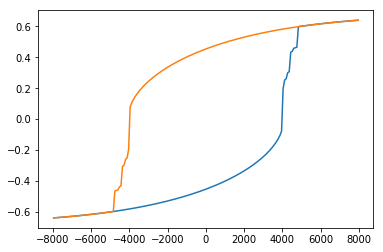

In [10]:
m = np.array(spins)
mxs = []
mys = []
mzs = []
for spin in m:
    mx = np.mean(spin[::6])
    my = np.mean(spin[1::6])
    mz = np.mean(spin[2::6])
    mxs.append(mx)
    mys.append(my)
    mzs.append(mz)
plt.plot(H, mys)
plt.plot(-H, -np.array(mys))


In [ ]:
!rm -rf unnamed_vtks/*.vtk
!rm -rf unnamed_npys/*.npy

sim = Sim(mesh, driver='steepest_descent')
sim.set_Ms(Ms_func)
sim.set_m((0, -1, 0))
sim.add(UniaxialAnisotropy(Ku, axis=Ku_axis))
sim.driver.do_precession = False
zee = Zeeman((0,0,0))
sim.add(zee)

Hmax = 0.05 / (4*np.pi*1e-7)
H = np.linspace(-Hmax, Hmax, 100)

spins = []
for h in H:
    print(f'setting h {h}')
    zee.update_field((0.00001, h, 0))
    sim.driver.minimise()
    print(sim.spin)
    spins.append(sim.spin.copy())

rspins = []
for h in H:
    print(f'setting h {h}')
    zee.update_field((0.00001, -h, 0))
    # sim.relax(stopping_dmdt=1e-4, save_vtk_steps=None, save_m_steps=None)
    sim.driver.minimise()
    print(sim.spin)
    rspins.append(sim.spin.copy())
    
    






In [ ]:
m = np.array(spins)
mxs = []
mys = []
mzs = []
for spin in m:
    mx = np.mean(spin[::6])
    my = np.mean(spin[1::6])
    mz = np.mean(spin[2::6])
    mxs.append(mx)
    mys.append(my)
    mzs.append(mz)
plt.plot(H, mys)
plt.plot(-H, -np.array(mys))
